In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/Clinical.csv').T
df.columns = df.iloc[1]
df = df[2:]
df.head()

attrib_name,years_to_birth,histological_type,gender,radiation_therapy,race,ethnicity,overall_survival,status,overallsurvival
TCGA.06.6391,44,untreatedprimary(denovo)gbm,female,no,white,nothispanicorlatino,45,1,"45,1"
TCGA.19.A6J4,68,glioblastomamultiforme(gbm),male,NaN,blackorafricanamerican,nothispanicorlatino,121,1,"121,1"
TCGA.CS.6665,51,astrocytoma,female,yes,white,nothispanicorlatino,1568,0,"1568,0"
TCGA.CS.6670,43,oligodendroglioma,male,NaN,white,nothispanicorlatino,1426,0,"1426,0"
TCGA.DB.A4XC,26,oligoastrocytoma,male,yes,white,nothispanicorlatino,1421,0,"1421,0"


In [4]:
df = df.drop(['overallsurvival', 'ethnicity', 'radiation_therapy', 'race'], axis=1)
df.dropna(inplace=True)

In [5]:
df.isna().sum()

attrib_name
years_to_birth       0
histological_type    0
gender               0
overall_survival     0
status               0
dtype: int64

In [6]:
mutation_df = pd.read_csv('../data/Mutation.csv').T
mutation_df.columns = mutation_df.iloc[1]
mutation_df = mutation_df[2:]
mutation_df.head()

attrib_name,A1CF,A2BP1,A2M,A2ML1,AACS,AADACL2,AADACL4,AARS,AATF,ABCA1,...,ZSCAN29,ZSCAN5A,ZSCAN5B,ZSWIM2,ZSWIM5,ZW10,ZXDB,ZXDC,ZZEF1,ZZZ3
TCGA.06.5411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.FG.A711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.06.2558,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.14.0813,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA.27.1833,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mutation_df.shape

(799, 5492)

In [11]:
df.reset_index().rename(columns={'index': 'PatientID'}).head().reset_index(drop=True)

attrib_name,PatientID,years_to_birth,histological_type,gender,overall_survival,status
0,TCGA.06.6391,44,untreatedprimary(denovo)gbm,female,45,1
1,TCGA.19.A6J4,68,glioblastomamultiforme(gbm),male,121,1
2,TCGA.CS.6665,51,astrocytoma,female,1568,0
3,TCGA.CS.6670,43,oligodendroglioma,male,1426,0
4,TCGA.DB.A4XC,26,oligoastrocytoma,male,1421,0


In [12]:
df['status'].value_counts()

status
1    595
0    452
Name: count, dtype: int64

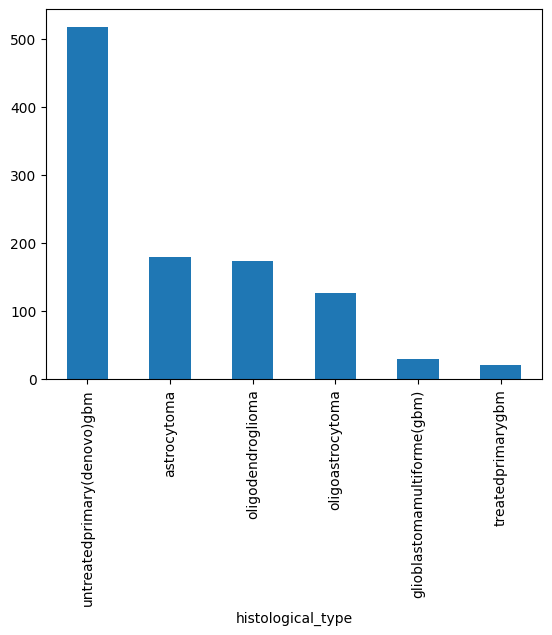

In [25]:
import matplotlib.pyplot as plt

df['histological_type'].value_counts().plot(kind='bar')
plt.show()

In [40]:
df['histological_type'].value_counts().reset_index()

,histological_type,count
0,5,518
1,0,180
2,3,173
3,2,127
4,1,29
5,4,20


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['histological_type'] = le.fit_transform(df['histological_type'])

<Axes: xlabel='attrib_name', ylabel='attrib_name'>

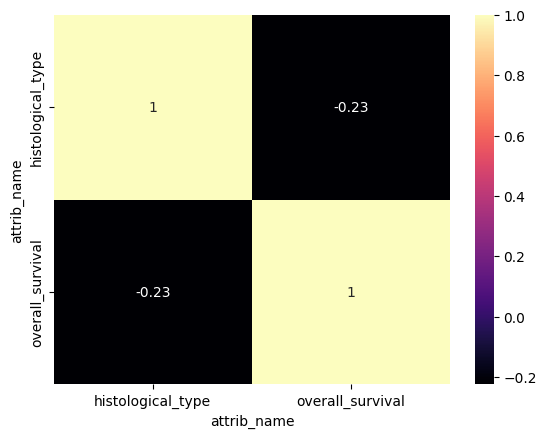

In [37]:
import seaborn as sns

sns.heatmap(df[['histological_type', 'overall_survival']].corr(), annot=True, cmap='magma')